In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
#K.set_image_data_format(‘channels_last’)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
path =r'/content/drive/MyDrive/Blade_Turbine_Set'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 759 images belonging to 4 classes.


In [ ]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 4)
Image Size of first image :  (227, 227, 3)
Output of first image :  (4,)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 1.]')

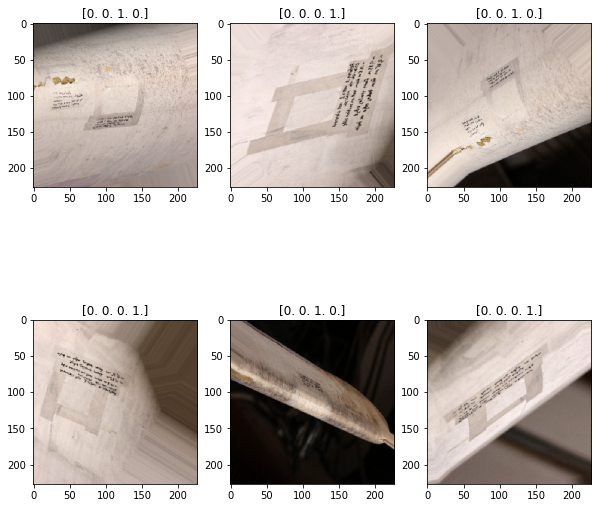

In [ ]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [ ]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    X = Dense(4,activation='softmax',name = 'fc2')(X)
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    
    return model

In [ ]:
alex = AlexNet(train[0][0].shape[1:])

In [ ]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 256)       1024

In [ ]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
history = alex.fit_generator(train,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
24/24 [==============================] - 238s 9s/step - loss: 34.9890 - accuracy: 0.3303
Epoch 2/100
24/24 [==============================] - 125s 5s/step - loss: 1.3521 - accuracy: 0.3965
Epoch 3/100
24/24 [==============================] - 122s 5s/step - loss: 1.2183 - accuracy: 0.4273
Epoch 4/100
24/24 [==============================] - 125s 5s/step - loss: 1.1397 - accuracy: 0.4913
Epoch 5/100
24/24 [==============================] - 125s 5s/step - loss: 1.0296 - accuracy: 0.5418
Epoch 6/100
24/24 [==============================] - 123s 5s/step - loss: 0.8954 - accuracy: 0.5995
Epoch 7/100
24/24 [==============================] - 124s 5s/step - loss: 0.8197 - accuracy: 0.6512
Epoch 8/100
24/24 [==============================] - 124s 5s/step - loss: 0.9547 - accuracy: 0.5695
Epoch 9/100
24/24 [==============================] - 124s 5s/step - loss: 0.5506 - accuracy: 0.7626
Epoch 10/100
24/24 [==============================] - 123s 5s/step - loss: 0.5862 - accuracy: 0.739

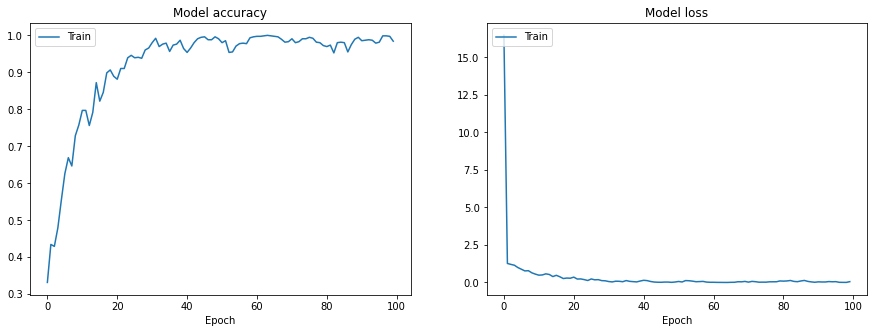

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(history.history['accuracy'])
#axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(history.history['loss'])
#axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

In [ ]:
score = alex.evaluate_generator(train, steps= len(train))

for idx, metric in enumerate(alex.metrics_names):
    print('{}:{}'.format(metric, score[idx]))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


loss:1.1051113605499268
accuracy:0.7417654991149902


In [ ]:
path_test = r'/content/drive/MyDrive/Blade_Turbine_Set'
test_datagen = ImageDataGenerator(rotation_range=25,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        horizontal_flip=True, rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 759 images belonging to 4 classes.


In [ ]:
preds = alex.evaluate_generator(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Loss = 1.7222650051116943
Test Accuracy = 0.6745718121528625


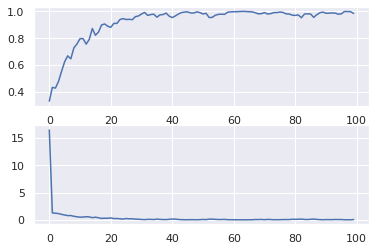

In [ ]:
#Type 1 of plotting 

f,ax=plt.subplots(2,1) 

#Loss
ax[1].plot(history.history['loss'],color='b',label='Training Loss')
#ax[1].plot(history.history['val_loss'],color='r',label='Validation Loss')

#Accuracy
ax[0].plot(history.history['accuracy'],color='b',label='Training  Accuracy')
#ax[0].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')